## Iris flower dataset

In [2]:
#导入数据集和plt包
from sklearn.datasets import load_iris
iris=load_iris()
import matplotlib.pyplot as plt

### 散点图

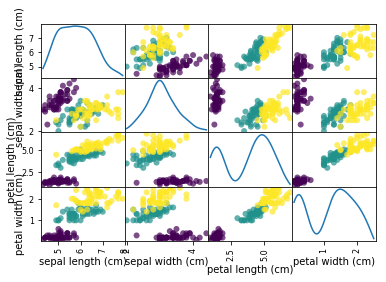

In [73]:
import pandas as pd
iris_dataframe=pd.DataFrame(iris.data,columns=iris.feature_names)
grr=pd.plotting.scatter_matrix(iris_dataframe,marker='o',c=iris.target,diagonal='kde',alpha=0.7)

可见不同特征选择的可分性不同，但setosa基本处于易分离的状态，不同选择特征对于virginica和versicolorr的可分性区别明显，比如sepal width&length、sepal length&sepal width，二者数据重合度较高，相应的分类器成功率肯定也会较低。对于petal length&width、sepal width&petal width等数据，将三者区分的成功率应该较高。

### Petal Width&Petal Length 线性回归

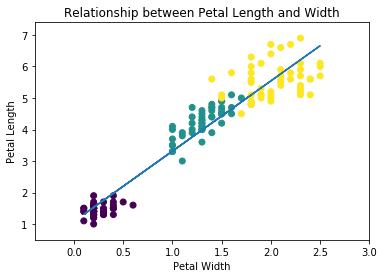

coefficient of determination: 0.9271098389904927
intercept: 1.0835580328505112
slope: 2.229940495121864


In [115]:
#取出源数据
x=iris.data[:,3]
y=iris.data[:,2]
species=iris.target

#设置x、y坐标轴范围
x_min,x_max=x.min()- .5,x.max()+ .5
y_min,y_max=y.min()- .5,y.max()+ .5

#使数据格式符合fit函数
x1=x.reshape(len(x),1)
y1=y.reshape(len(y),1)

#LinearRegression模型线性回归预测
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x1,y1)
pre = clf.predict(x1)

#画图
plt.figure()
plt.title('Relationship between Petal Length and Width')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.scatter(x,y,c=species)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks()
plt.yticks()
plt.plot(x1,pre)
plt.show()

#定性分析线性回归效果
r_sq=clf.score(x1,y1)
print('coefficient of determination:',r_sq)
print('intercept:',clf.intercept_[0])
print('slope:',clf.coef_[0][0])

### Sepal Width&Sepal Length 线性回归

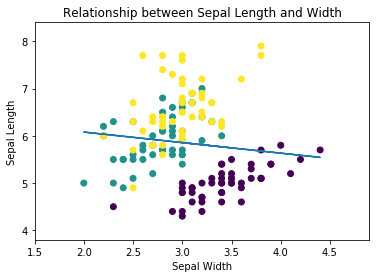

coefficient of determination: 0.013822654141080859
intercept: 6.526222550894481
slope: -0.22336106112989984


In [114]:
#取出源数据
x=iris.data[:,1]
y=iris.data[:,0]
species=iris.target

#设置x、y坐标轴范围
x_min,x_max=x.min()- .5,x.max()+ .5
y_min,y_max=y.min()- .5,y.max()+ .5

#使数据格式符合fit函数
x1=x.reshape(len(x),1)
y1=y.reshape(len(y),1)

#LinearRegression模型线性回归预测
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x1,y1)
pre = clf.predict(x1)

#画图
plt.figure()
plt.title('Relationship between Sepal Length and Width')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.scatter(x,y,c=species)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks()
plt.yticks()
plt.plot(x1,pre)
plt.show()

#定性分析线性回归效果
r_sq=clf.score(x1,y1)
print('coefficient of determination:',r_sq)
print('intercept:',clf.intercept_[0])
print('slope:',clf.coef_[0][0])

#### 线性回归比较
Petal Width&Petal Length 线性回归中，回归系数为0.927，从图中直观也可看出，数据与拟合直线重合率较高，可见较为成功，二者基本应该为线性关系。
Sepal Width&Sepal Length 线性回归中，回归系数为0.014，可见二者无线性关系。
明显第一个适合使用线性回归，第二个不适合。

### 分类器

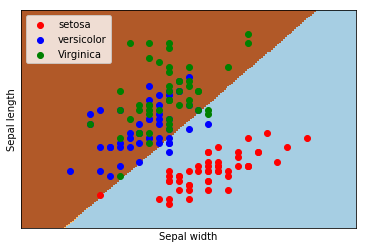

classification accuracy: 0.6466666666666666
coef:
 [[ 2.41609825 -1.4302893 ]
 [-0.05424269 -0.08450031]
 [-1.57588135  0.7918538 ]]
intercept:
 [ 0.29735262 -0.01493466 -0.40979427]


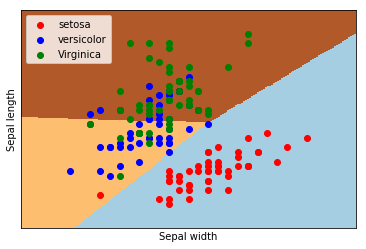

classification accuracy: 0.7933333333333333
coef:
 [[10.54847035 -6.65403409]
 [-0.88022639  0.33174291]
 [-0.74886919  2.30708818]]
intercept:
 [  3.29501413   0.0161825  -12.33170902]


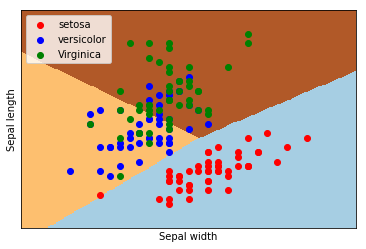

classification accuracy: 0.8
coef:
 [[ 13.27985201 -13.21199637]
 [ -3.18975677   0.1328934 ]
 [ -0.74600204   2.6022093 ]]
intercept:
 [ 29.71540067   8.00568416 -14.1809739 ]


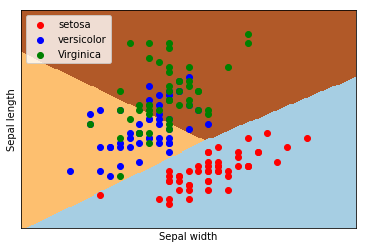

classification accuracy: 0.8066666666666666
coef:
 [[ 29.63282048 -32.00790225]
 [ -3.21259106   0.1294651 ]
 [ -0.74600204   2.6022093 ]]
intercept:
 [ 79.14965401   8.09203589 -14.1809739 ]


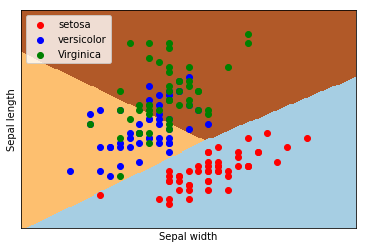

classification accuracy: 0.8066666666666666
coef:
 [[ 29.63282048 -32.00790225]
 [ -3.21259106   0.1294651 ]
 [ -0.74600204   2.6022093 ]]
intercept:
 [ 79.14965401   8.09203589 -14.1809739 ]


In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")  # 忽略版本问题
x1= iris.data[:,1]   #X直接等于data中两列数据  
x2= iris.data[:,0]
X=np.column_stack((x1,x2))
Y = iris.target             
  
#生成两个网格矩阵  
h = .02  
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  

for i in [1,5,10,50,100]:#迭代次数
#逻辑回归模型  
    lr = LogisticRegression(C=1e5,max_iter=i,solver='liblinear',multi_class='auto')    
    lr.fit(X,Y)  
#绘制xx,yy两个网格矩阵和对应的预测结果 
    Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])  
    Z = Z.reshape(xx.shape)  
    plt.figure  
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)  
#绘制散点图  
    plt.scatter(X[:50,0], X[:50,1], color='red',marker='o', label='setosa')  
    plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='o', label='versicolor')  
    plt.scatter(X[100:,0], X[100:,1], color='green', marker='o', label='Virginica')   
    plt.xlabel('Sepal width')  
    plt.ylabel('Sepal length')  
    plt.xlim(xx.min(), xx.max())  
    plt.ylim(yy.min(), yy.max())  
    plt.xticks(())  
    plt.yticks(())  
    plt.legend(loc=2)   
    plt.show()  
#分类器方程和准确率
    sc=lr.score(X,Y)
    print('classification accuracy:',sc)
    print('coef:\n',lr.coef_)
    print('intercept:\n',lr.intercept_)